<a href="https://colab.research.google.com/github/devaraji08/Codsoft/blob/main/Stock_movement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Market Analysis - Internship assignment

In [3]:
pip install praw

Data Scrapping

In [26]:
import praw
import time
import json
client_id = 'Pr603v4fb55JE56WhBWSXQ'
client_secret = 'DKgMQdhnDm-OwpU6WPMXezhpuHusBw'
user_agent = 'Stock_data_scrapper'
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)
subreddit = reddit.subreddit('stocks')
scraped_data = []
for post in subreddit.hot(limit=100):
    post_data = {
        "title": post.title,
        "score": post.score,
        "url": post.url,
        "author": str(post.author),
        "id": post.id,
        "comments": []
    }


    post.comments.replace_more(limit=0)
    for comment in post.comments.list():
        post_data["comments"].append({
            "author": str(comment.author),
            "comment": comment.body
        })

    scraped_data.append(post_data)


    time.sleep(2)
with open("scraped_reddit_data.json", "w") as outfile:
    json.dump(scraped_data, outfile, indent=4)
print("Data saved to scraped_reddit_data.json")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Data saved to scraped_reddit_data.json


In [27]:
import pandas as pd

In [28]:
df_reddit=pd.read_json("scraped_reddit_data.json")

Data Processing

In [29]:
df_reddit.head()

,title,score,url,author,id,comments
0,r/Stocks Daily Discussion & Fundamentals Frida...,24,https://www.reddit.com/r/stocks/comments/1grtf...,AutoModerator,1grtfyq,"[{'author': '_hiddenscout', 'comment': 'It’s p..."
1,r/Stocks Daily Discussion & Options Trading Th...,1,https://www.reddit.com/r/stocks/comments/1h1t4...,AutoModerator,1h1t4ca,"[{'author': 'thebigbadwolf22', 'comment': 'Are..."
2,If you could only buy one stock now what would...,1081,https://www.reddit.com/r/stocks/comments/1h1cd...,assault_rifle_,1h1cds4,"[{'author': 'None', 'comment': '[removed]'}, {..."
3,Microsoft faces wide-ranging U.S. antitrust probe,145,https://www.reddit.com/r/stocks/comments/1h1kq...,Puginator,1h1kqio,"[{'author': 'FarrisAT', 'comment': 'Google say..."
4,Did Cathie Wood Just Dump More TSLA and PLTR,20,https://www.reddit.com/r/stocks/comments/1h1tm...,West-Bodybuilder-867,1h1tmrz,"[{'author': 'RandolphE6', 'comment': 'ARKK is ..."


In [30]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     100 non-null    object
 1   score     100 non-null    int64 
 2   url       100 non-null    object
 3   author    100 non-null    object
 4   id        100 non-null    object
 5   comments  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [31]:
df_reddit.shape

(100, 6)

In [33]:
df_reddit.isnull().sum()

,0
title,0
score,0
url,0
author,0
id,0
comments,0


In [35]:
df_reddit.dropna(inplace=True)

Text mining

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df_reddit['sentiment_title'] = df_reddit['title'].apply(analyze_sentiment)


first_comment = df_reddit['comments'][0][0]['comment'] if df_reddit['comments'][0] else ""
sentiment_score = analyze_sentiment(first_comment)
print(f"Sentiment score for the first comment of the first post: {sentiment_score}")

all_comments_sentiment = []
for index, row in df_reddit.iterrows():
    post_comments = []
    for comment_data in row['comments']:
      comment = comment_data['comment']
      post_comments.append(analyze_sentiment(comment))
    all_comments_sentiment.append(post_comments)

df_reddit['comments_sentiment'] = all_comments_sentiment

print(df_reddit.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment score for the first comment of the first post: 0.7284
                                               title  score  \
0  r/Stocks Daily Discussion & Fundamentals Frida...     24   
1  r/Stocks Daily Discussion & Options Trading Th...      1   
2  If you could only buy one stock now what would...   1081   
3  Microsoft faces wide-ranging U.S. antitrust probe    145   
4       Did Cathie Wood Just Dump More TSLA and PLTR     20   

                                                 url                author  \
0  https://www.reddit.com/r/stocks/comments/1grtf...         AutoModerator   
1  https://www.reddit.com/r/stocks/comments/1h1t4...         AutoModerator   
2  https://www.reddit.com/r/stocks/comments/1h1cd...        assault_rifle_   
3  https://www.reddit.com/r/stocks/comments/1h1kq...             Puginator   
4  https://www.reddit.com/r/stocks/comments/1h1tm...  West-Bodybuilder-867   

        id                                           comments  \
0  1grtfyq  [{'author':

Sentiment analysis


In [46]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']


df_reddit['comment_sentiment'] = df_reddit['comments'].apply(lambda comments: [analyze_sentiment(comment['comment']) for comment in comments])


df_reddit['avg_sentiment'] = df_reddit['comment_sentiment'].apply(lambda scores: sum(scores) / len(scores) if scores else 0)


print(df_reddit[['title', 'avg_sentiment']].head())


# Example:
df_reddit['title_sentiment'] = df_reddit['title'].apply(analyze_sentiment)
print(df_reddit[['title','title_sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               title  avg_sentiment
0  r/Stocks Daily Discussion & Fundamentals Frida...       0.127595
1  r/Stocks Daily Discussion & Options Trading Th...       0.212938
2  If you could only buy one stock now what would...       0.147292
3  Microsoft faces wide-ranging U.S. antitrust probe       0.040930
4       Did Cathie Wood Just Dump More TSLA and PLTR       0.188892
                                               title  title_sentiment
0  r/Stocks Daily Discussion & Fundamentals Frida...           0.0000
1  r/Stocks Daily Discussion & Options Trading Th...           0.0000
2  If you could only buy one stock now what would...           0.0000
3  Microsoft faces wide-ranging U.S. antitrust probe           0.0000
4       Did Cathie Wood Just Dump More TSLA and PLTR          -0.3818


Model Prediction

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Prediction using scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

X = df_reddit['title']
y = df_reddit['score']

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Example
new_title = ["New stock market prediction"]
new_title_vec = vectorizer.transform(new_title)
predicted_score = model.predict(new_title_vec)
print(f"Predicted score for '{new_title[0]}': {predicted_score[0]}")

Mean Squared Error: 40497.12410641958
R-squared: -0.14240888677873387
Predicted score for 'New stock market prediction': 196.98820348683972


In [51]:
#Prediction using tensorflow
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train.toarray(), y_train, epochs=50, batch_size=32, validation_split=0.2)

loss, mae = model.evaluate(X_test.toarray(), y_test, verbose=0)
print(f"Mean Absolute Error: {mae}")


predictions = model.predict(X_test.toarray())

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - loss: 30571.3965 - mae: 89.8925 - val_loss: 85552.1016 - val_mae: 125.9085
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 34353.0352 - mae: 99.1386 - val_loss: 85545.6641 - val_mae: 125.8891
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 31339.1016 - mae: 95.3201 - val_loss: 85539.1562 - val_mae: 125.8690
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 29736.5762 - mae: 91.6859 - val_loss: 85532.0156 - val_mae: 125.8484
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 30358.4551 - mae: 93.2495 - val_loss: 85524.5547 - val_mae: 125.8269
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 30212.2422 - mae: 94.5936 - val_loss: 85516.5469 - val_mae: 125.8029
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 27237.4824 - mae: 88.1632 - val_loss: 85508.1953 - val_mae: 125.7773
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 29741.2344 - mae: 91.0062 - val_loss: 85499.2188 - val_

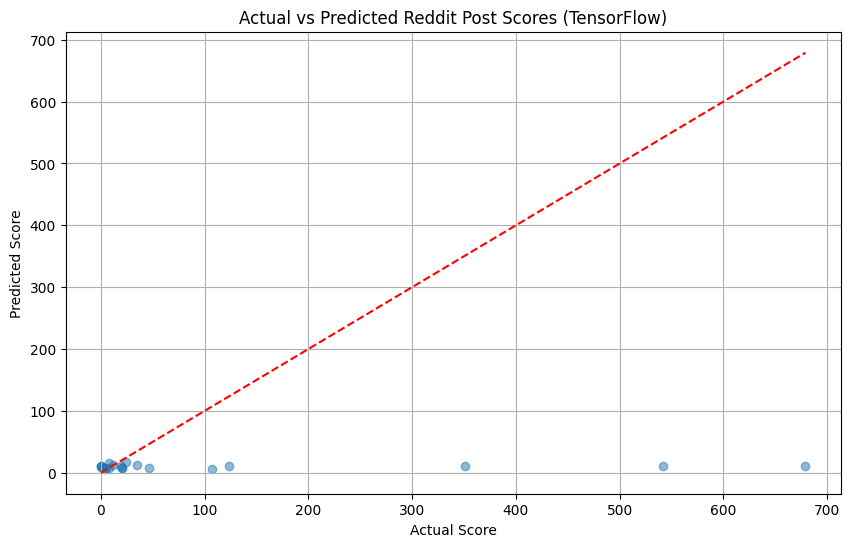

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line for perfect prediction
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Reddit Post Scores (TensorFlow)")
plt.grid(True)
plt.show()

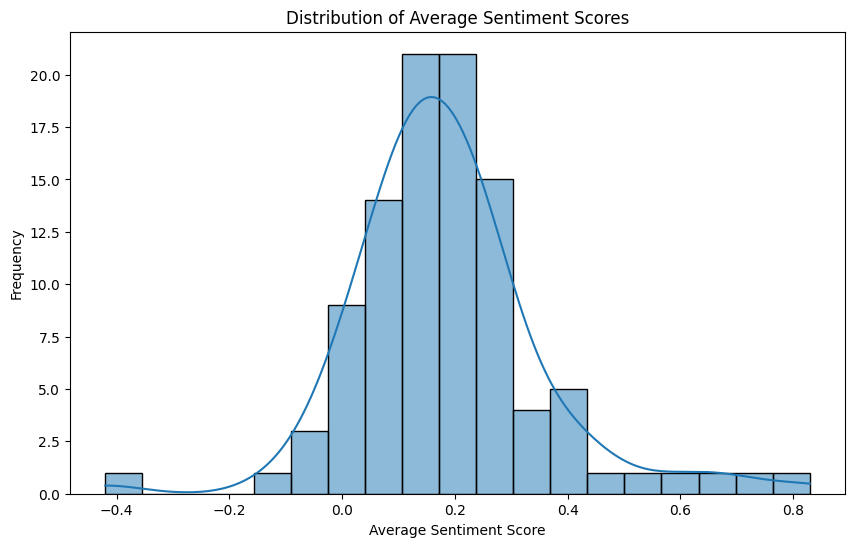

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_reddit['avg_sentiment'], kde=True)
plt.title('Distribution of Average Sentiment Scores')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Frequency')
plt.show()


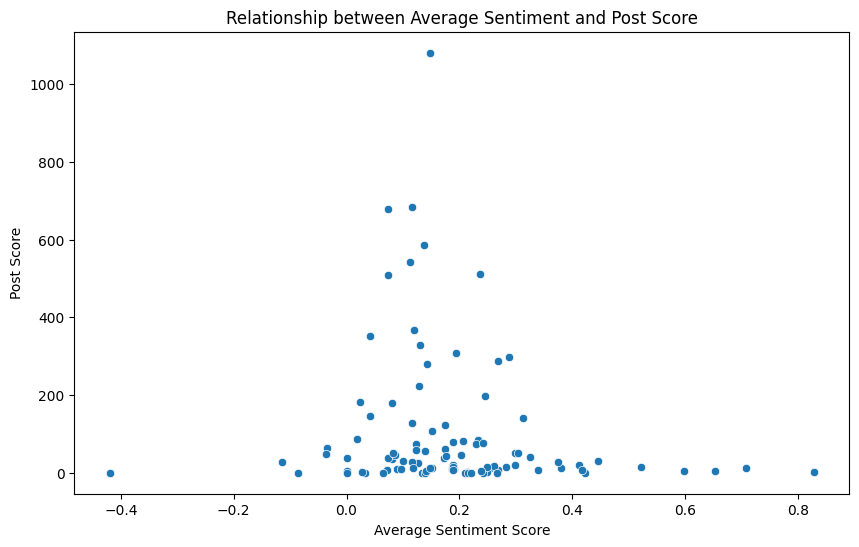

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_sentiment', y='score', data=df_reddit)
plt.title('Relationship between Average Sentiment and Post Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Post Score')
plt.show()
